# 1. Dataset Selection

In [50]:
# Load the datasets from the uploaded files
import pandas as pd

# File paths from user-uploaded data
mat_file_path = "./data/student-mat.csv"
por_file_path = "./data/student-por.csv"

# Reading the CSV files
student_mat = pd.read_csv(mat_file_path, sep=';')
student_por = pd.read_csv(por_file_path, sep=';')
num_rows_student_mat, num_attributes_student_mat = student_mat.shape
print(f"Number of rows in mat file: {num_rows_student_mat}")
print(f"Number of attributes (columns) in mat file: {num_attributes_student_mat}")

num_rows_student_por, num_attributes_student_por = student_por.shape
print(f"Number of rows in por file: {num_rows_student_por}")
print(f"Number of attributes (columns) in por file: {num_attributes_student_por}")
# Displaying the first few rows of both datasets to verify loading


Number of rows in mat file: 395
Number of attributes (columns) in mat file: 33
Number of rows in por file: 649
Number of attributes (columns) in por file: 33


Mapping: school {'GP': 0, 'MS': 1}
Mapping: sex {'F': 0, 'M': 1}
Mapping: address {'R': 0, 'U': 1}
Mapping: famsize {'GT3': 0, 'LE3': 1}
Mapping: Pstatus {'A': 0, 'T': 1}
Mapping: Mjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Mapping: Fjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Mapping: reason {'course': 0, 'home': 1, 'other': 2, 'reputation': 3}
Mapping: guardian {'father': 0, 'mother': 1, 'other': 2}
Mapping: schoolsup {'no': 0, 'yes': 1}
Mapping: famsup {'no': 0, 'yes': 1}
Mapping: paid {'no': 0, 'yes': 1}
Mapping: activities {'no': 0, 'yes': 1}
Mapping: nursery {'no': 0, 'yes': 1}
Mapping: higher {'no': 0, 'yes': 1}
Mapping: internet {'no': 0, 'yes': 1}
Mapping: romantic {'no': 0, 'yes': 1}


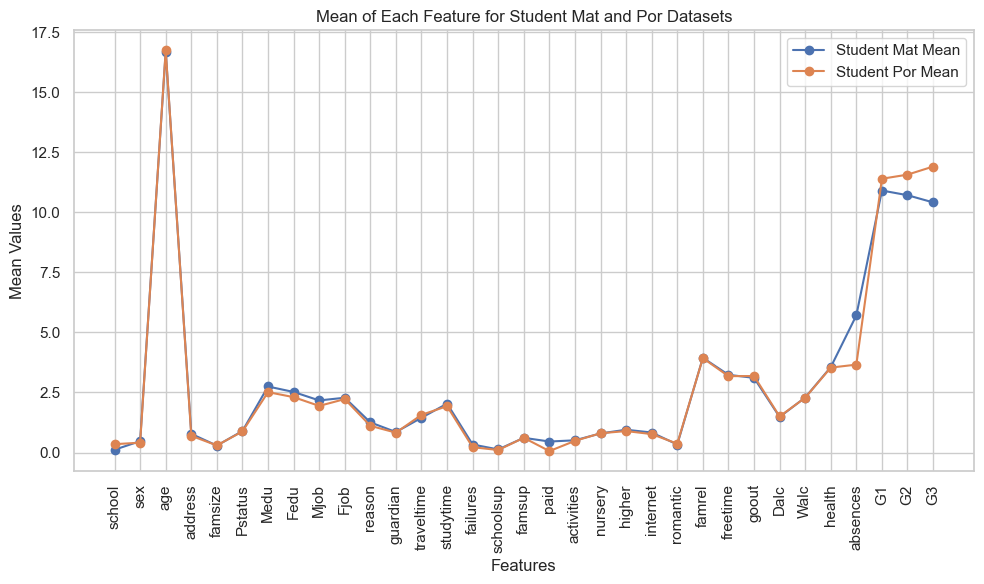

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# File paths for data (adjust paths if needed)
mat_file_path = "./data/student-mat.csv"
por_file_path = "./data/student-por.csv"

# Reading the CSV files
student_mat = pd.read_csv(mat_file_path, sep=';')
student_por = pd.read_csv(por_file_path, sep=';')
student_mat_mapping = student_mat
student_por_mapping = student_por

categorical_columns = student_mat.select_dtypes(include='object').columns
for col in categorical_columns:
    le = LabelEncoder()
    student_mat_mapping[col] = le.fit_transform(student_mat[col])
    student_por_mapping[col] =  le.fit_transform(student_por_mapping[col])
    mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print(f"Mapping: {col}", mapping)

# Calculate the mean for each feature in both datasets
mat_means = student_mat_mapping.describe().loc['mean']
por_means = student_por_mapping.describe().loc['mean']

# Prepare data for plotting
mean_df = pd.DataFrame({
    "Features": mat_means.index,
    "Mat Mean": mat_means.values,
    "Por Mean": por_means.values
})


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_df["Features"], mean_df["Mat Mean"], marker='o', label="Student Mat Mean")
plt.plot(mean_df["Features"], mean_df["Por Mean"], marker='o', label="Student Por Mean")
plt.xlabel("Features")
plt.ylabel("Mean Values")
plt.title("Mean of Each Feature for Student Mat and Por Datasets")
plt.xticks(rotation=90)  # Rotate feature labels for readability
plt.legend()
plt.tight_layout()
plt.show()

# 2. Data Analysis

### 1. Distribution of Final Grades (G3)

### Why this visualization?
A histogram with a KDE overlay shows the overall distribution of final grades (G3).
It helps to identify patterns, such as normality, skewness, or clustering in grades.

### Significance
Highlights whether the data is evenly distributed or concentrated in specific grade ranges.
Identifies peaks (e.g., a high frequency of failing grades) or gaps in performance.

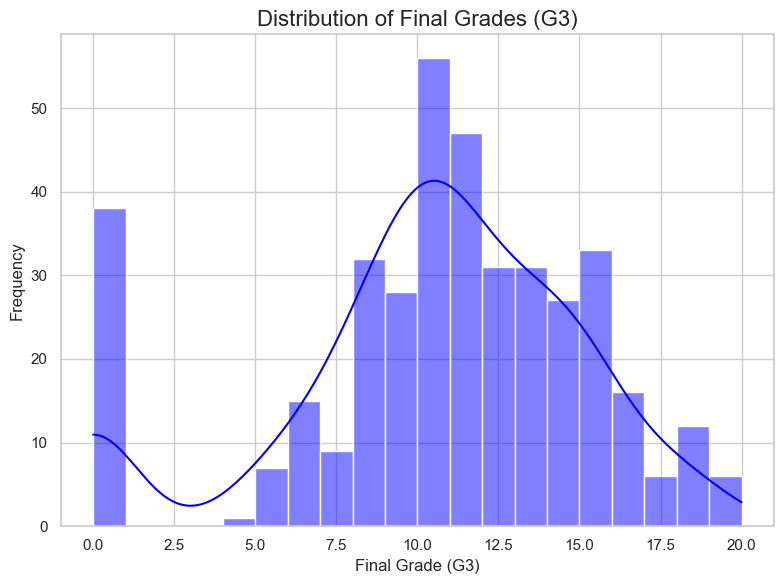

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set(style="whitegrid")

# 1. Distribution of Final Grades (G3)
plt.figure(figsize=(8, 6))
sns.histplot(student_mat['G3'], bins=20, kde=True, color='blue')
plt.title('Distribution of Final Grades (G3)', fontsize=16)
plt.xlabel('Final Grade (G3)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()




### 2. Final Grade (G3) vs. Study Time

### Why this visualization?
A boxplot visualizes the relationship between weekly study time and final grades.
It shows how grade distributions differ across study time categories.

### Significance
Determines whether more study time correlates with higher grades.
Useful for identifying diminishing returns, such as students studying for long hours but not achieving better grades.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



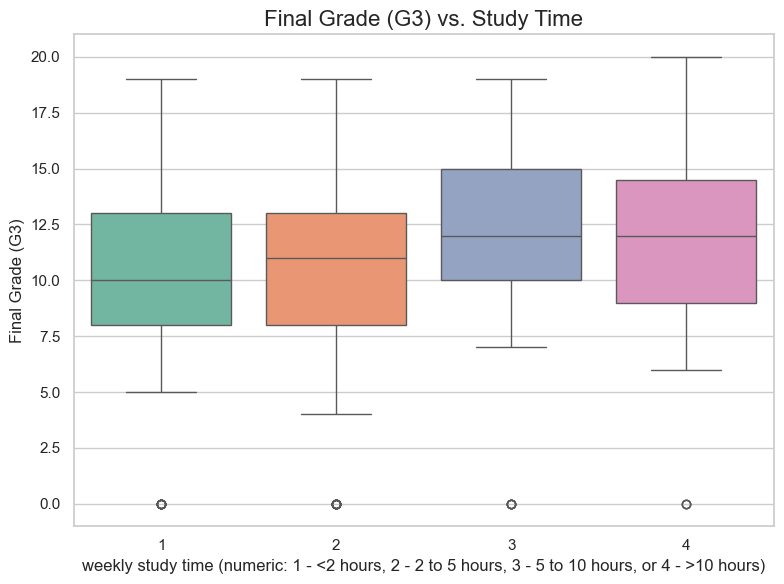

In [53]:
# 2. Final Grade (G3) vs. Study Time
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=student_mat, palette='Set2')
plt.title('Final Grade (G3) vs. Study Time', fontsize=16)
plt.xlabel('weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()



### 3. Final Grade (G3) vs. Absences
### Why this visualization?
A scatter plot with a regression line highlights the relationship between absences and final grades.
Visualizes whether students with high absences tend to have lower grades.
### Significance
Helps assess the impact of absenteeism on academic success.
Provides evidence for attendance policies or interventions to improve performance


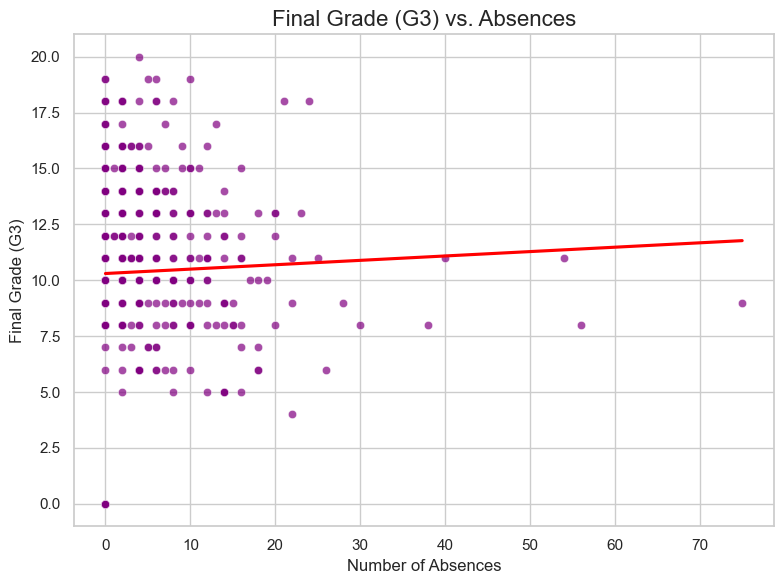

In [54]:
# 3. Final Grade (G3) vs. Absences
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='G3', data=student_mat, color='purple', alpha=0.7)
sns.regplot(x='absences', y='G3', data=student_mat, scatter=False, color='red', ci=None)
plt.title('Final Grade (G3) vs. Absences', fontsize=16)
plt.xlabel('Number of Absences', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()


### 4. Final Grade (G3) vs. Parental Education Level

### Why this visualization?
A bar chart compares average final grades across levels of parental education.
Parental education levels (Medu and Fedu) are averaged to create a single measure.

### Significance
Demonstrates the role of parental education in academic performance.
Provides insights for support programs targeting students from less-educated households.



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



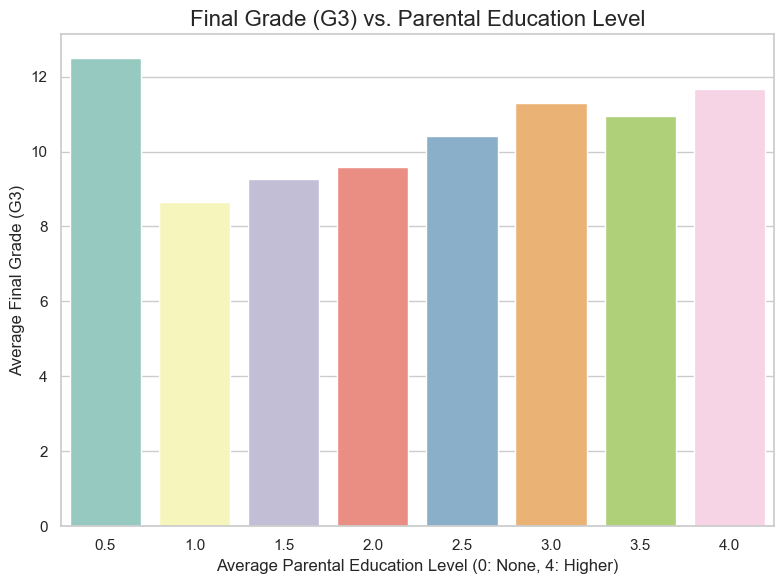

In [55]:

# 4. Final Grade (G3) vs. Parental Education Level
plt.figure(figsize=(8, 6))
parent_edu = student_mat[['Medu', 'Fedu', 'G3']].assign(
    ParentalEducation=(student_mat['Medu'] + student_mat['Fedu']) / 2
)
sns.barplot(x='ParentalEducation', y='G3', data=parent_edu, ci=None, palette='Set3')
plt.title('Final Grade (G3) vs. Parental Education Level', fontsize=16)
plt.xlabel('Average Parental Education Level (0: None, 4: Higher)', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()


### 5. Final Grade (G3) vs. Internet Access at Home
### Why this visualization?
A violin plot shows the distribution of final grades for students with and without home internet access.
It highlights variations and density of grades within each category.
### Significance
Identifies disparities in performance based on access to online resources.
Can inform initiatives to provide internet access for underprivileged students



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



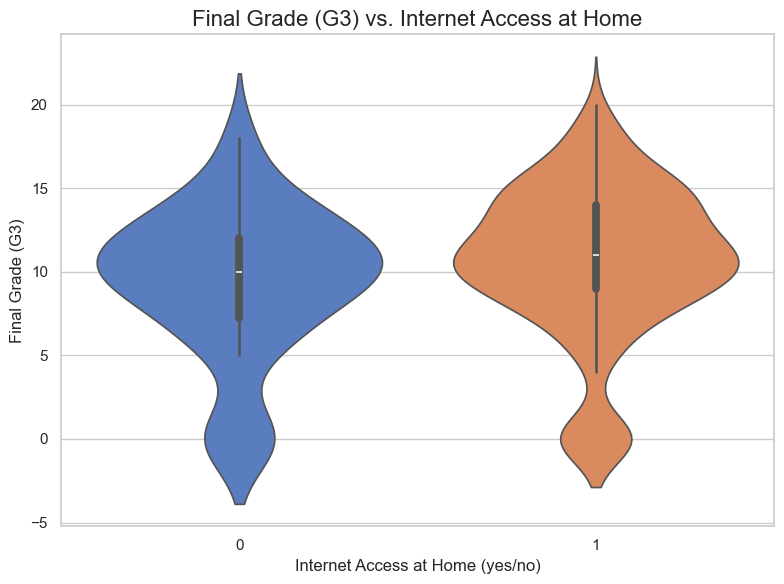

In [56]:

# 5. Final Grade (G3) vs. Internet Access at Home
plt.figure(figsize=(8, 6))
sns.violinplot(x='internet', y='G3', data=student_mat, palette='muted')
plt.title('Final Grade (G3) vs. Internet Access at Home', fontsize=16)
plt.xlabel('Internet Access at Home (yes/no)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Basic Model Pipeline
Building and evaluating a regression model to predict students' final grades (G3) using the XGBoost Regressor

Accuracy within ±2: 88.61%
Mean Absolute Error (MAE): 1.1976207260726184
Mean Squared Error (MSE): 4.926960003184174
R² Score: 0.7597196466424497

MAE: Indicates that predictions are typically off by about 1.2 grade points, on average.
MSE: Shows a penalty for larger errors and confirms the model performs reasonably well.
R² Score: Suggests the model captures a significant portion (76%) of the variation in grades but still has room for improvement.



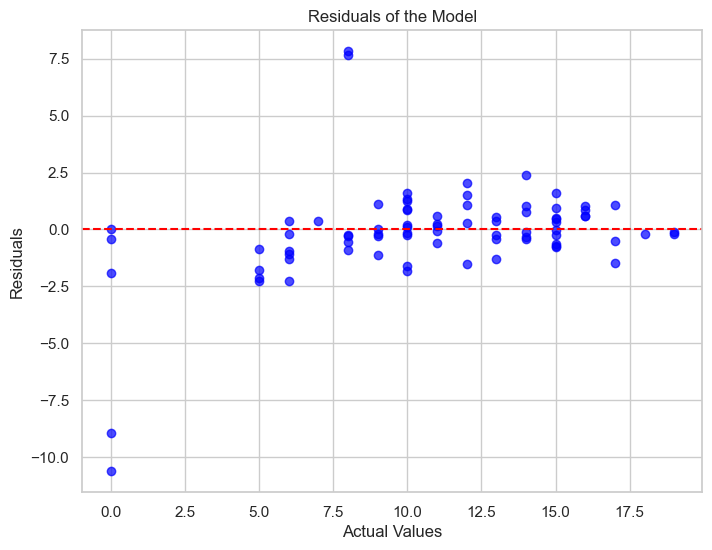

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = student_mat.drop(columns=['G3'])  # Features
y = student_mat['G3']  # Target

# Encode categorical variables
categorical_columns = X.select_dtypes(include='object').columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    student_mat[col] =  le.fit_transform(X[col])
    mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print(f"Mapping: {col}", mapping)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the model
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
threshold = 2
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= threshold)
accuracy = accurate_predictions / len(y_test) * 100
print(f"Accuracy within ±{threshold}: {accuracy:.2f}%")

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print("""
MAE: Indicates that predictions are typically off by about 1.2 grade points, on average.
MSE: Shows a penalty for larger errors and confirms the model performs reasonably well.
R² Score: Suggests the model captures a significant portion (76%) of the variation in grades but still has room for improvement.
""")
# Visualize residuals
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of the Model')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()
# Extract feature importance
import pandas as pd

feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)





# 4. Error Analysis


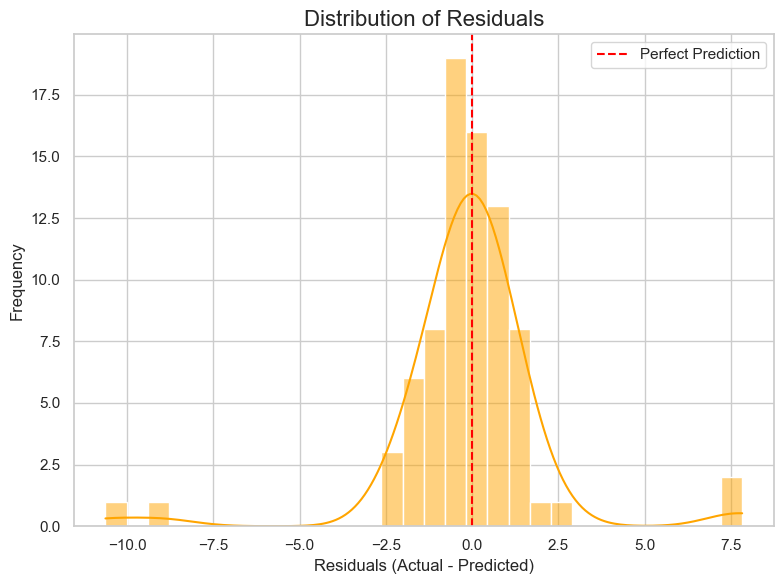

In [102]:
# Error Analysis

# Add residuals to the test set for analysis
test_set_with_residuals = X_test.copy()
test_set_with_residuals['Actual'] = y_test
test_set_with_residuals['Predicted'] = y_pred
test_set_with_residuals['Residual'] = test_set_with_residuals['Actual'] - test_set_with_residuals['Predicted']


# Visualization of residuals distribution
plt.figure(figsize=(8, 6))
sns.histplot(test_set_with_residuals['Residual'], kde=True, color='orange', bins=30)
plt.axvline(0, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



### Identifying Best and Worst Predictions Based on Residuals

In [103]:
# Sort by largest residuals (absolute errors)
test_set_with_residuals['AbsoluteError'] = test_set_with_residuals['Residual'].abs()
worst_performance = test_set_with_residuals.sort_values(by='AbsoluteError', ascending=False).head(4)
best_performance = test_set_with_residuals.sort_values(by='AbsoluteError', ascending=True).head(4)

In [104]:
print(worst_performance)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
140       0    1   15        1        0        1     4     3     4     3  ...   
316       0    0   18        1        0        1     2     1     3     2  ...   
90        0    0   16        1        0        1     3     3     2     2  ...   
124       0    0   16        1        0        1     2     2     2     2  ...   

     Dalc  Walc  health  absences  G1  G2  Actual  Predicted   Residual  \
140     1     1       3         0   7   9       0  10.625646 -10.625646   
316     1     2       1         0   8   8       0   8.932832  -8.932832   
90      1     3       4         0   7   7       8   0.171101   7.828899   
124     1     1       5         0   8   7       8   0.345771   7.654229   

     AbsoluteError  
140      10.625646  
316       8.932832  
90        7.828899  
124       7.654229  

[4 rows x 36 columns]


In [89]:
best_performance

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,Actual,Predicted,Residual,AbsoluteError
141,0,1,16,1,1,1,2,2,3,3,...,2,2,2,8,9,9,9,8.997868,0.002132,0.002132
137,0,0,16,1,0,0,3,3,2,2,...,1,1,5,0,4,0,0,-0.012522,0.012522,0.012522
9,0,1,15,1,0,1,3,4,2,2,...,1,1,5,0,14,15,15,15.024858,-0.024858,0.024858
272,0,0,18,1,1,1,1,1,2,2,...,1,1,3,2,11,11,11,11.053182,-0.053182,0.053182


### Comparison of Feature Means Across Worst, Best, and Overall Predictions

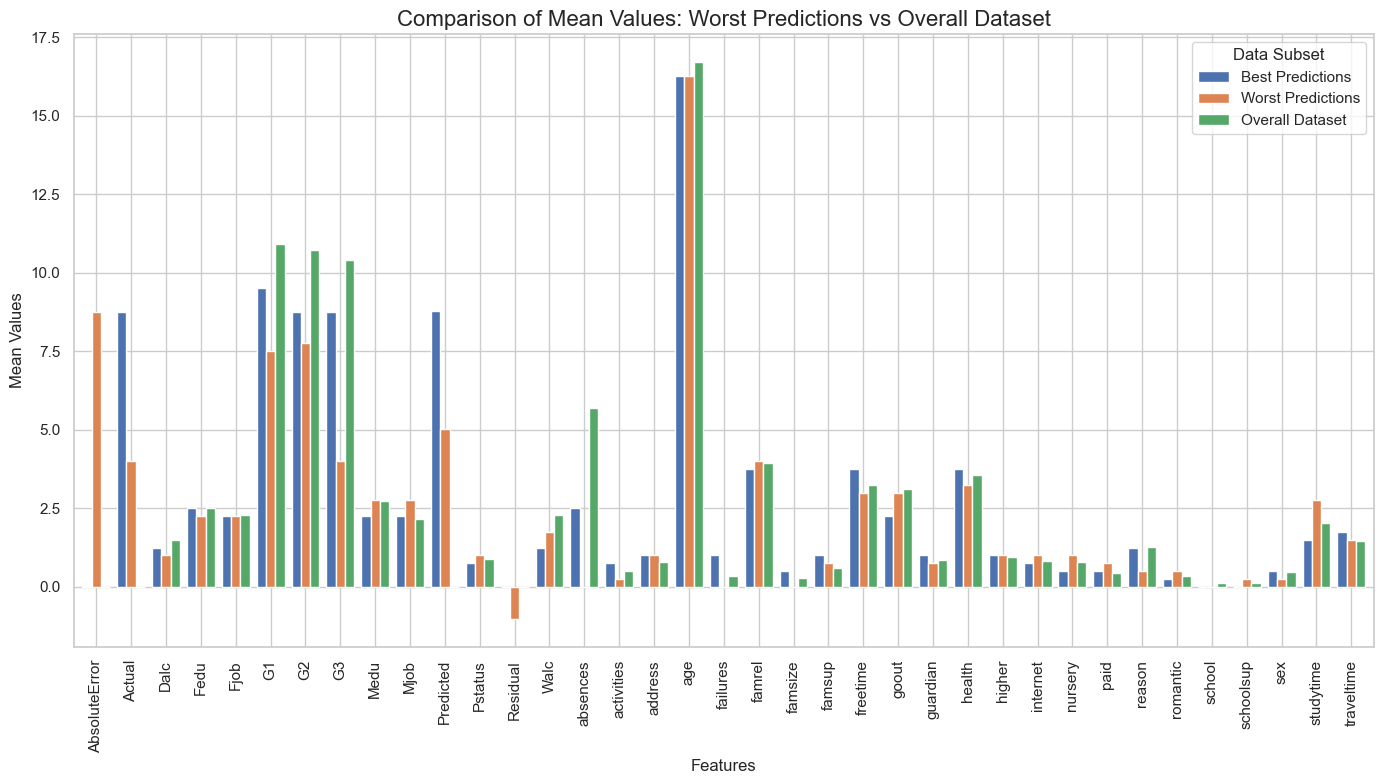

In [98]:
worst_stats = worst_performance.describe()
best_performance_stats = best_performance.describe()
overall_stats = student_mat.describe()

worst_stats['G3'] = worst_stats['Actual']
best_performance_stats['G3'] = best_performance_stats['Actual']

best_performance_stats_means = best_performance_stats.loc['mean']

woest_performance_stats_means = worst_stats.loc['mean']

overall_means = overall_stats.loc['mean']

# Combine into a single DataFrame for comparison
comparison_means = pd.DataFrame({
    'Best Predictions': best_performance_stats_means,
    'Worst Predictions': woest_performance_stats_means,
    'Overall Dataset': overall_means
})

# Plot comparison as a grouped bar chart
comparison_means.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Comparison of Mean Values: Worst Predictions vs Overall Dataset', fontsize=16)
plt.ylabel('Mean Values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Data Subset')
plt.tight_layout()
plt.show()


 We observe that G1, G2, and G3 in the best predictions and the overall dataset are similar. However, in the worst predictions, there is a significant difference between G1/G2 and G3. This suggests that, in the worst predictions, the model likely expected G3 to be closer to G1 and G2, but this assumption did not hold true.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



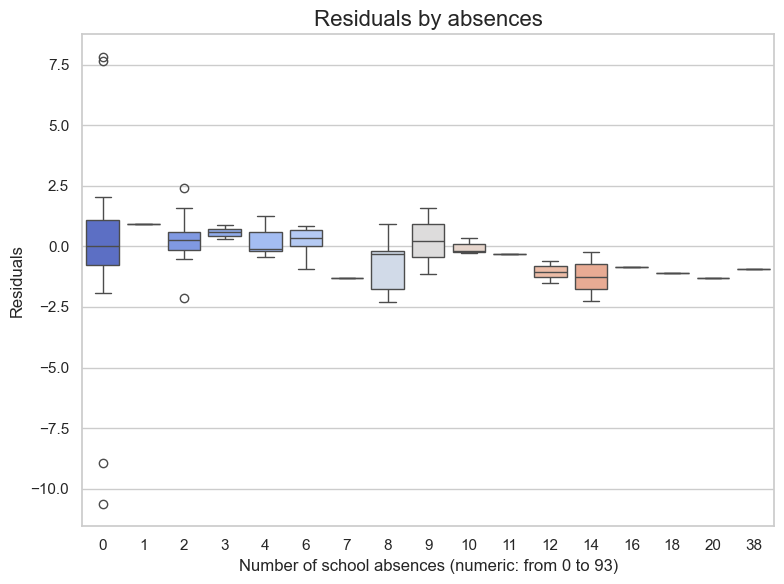

In [63]:
# Visualize residuals by specific features
plt.figure(figsize=(8, 6))
sns.boxplot(x='absences', y='Residual', data=test_set_with_residuals, palette='coolwarm')
plt.title('Residuals by absences', fontsize=16)
plt.xlabel('Number of school absences (numeric: from 0 to 93)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.tight_layout()
plt.show()

In [100]:
# Compute the absolute differences
gaps_worst_overall = (comparison_means['Worst Predictions'] - comparison_means['Overall Dataset']).abs()
gaps_best_overall = (comparison_means['Best Predictions'] - comparison_means['Overall Dataset']).abs()

# Calculate Z-scores
z_scores_worst_overall = gaps_worst_overall / overall_stats.loc['std']
z_scores_best_overall = gaps_best_overall / overall_stats.loc['std']

# Identify features with significant Z-scores
significant_z_scores = pd.DataFrame({
    'Feature': comparison_means.index,
    'Z-Score Worst vs Overall': z_scores_worst_overall,
    'Z-Score Best vs Overall': z_scores_best_overall
}).sort_values(by=['Z-Score Worst vs Overall', 'Z-Score Best vs Overall'], ascending=False)

print(significant_z_scores.head(12))



               Feature  Z-Score Worst vs Overall  Z-Score Best vs Overall
G3                  G3                  1.400255                 0.363464
G1                  G1                  1.027014                 0.424459
studytime    studytime                  0.851433                 0.638009
G2                  G2                  0.787962                 0.522111
absences      absences                  0.713332                 0.400952
famsize        famsize                  0.636134                 0.465940
reason          reason                  0.625454                 0.004714
paid              paid                  0.584850                 0.083731
Dalc              Dalc                  0.540014                 0.259349
address        address                  0.534714                 0.534714
activities  activities                  0.517147                 0.481743
nursery        nursery                  0.507256                 0.729572


In [65]:
# Summarize error analysis results for clarity
# Overestimation vs Underestimation
overestimation = (test_set_with_residuals['Residual'] < 0).sum()
underestimation = (test_set_with_residuals['Residual'] > 0).sum()

# Calculate key metrics for residuals
total_predictions = len(test_set_with_residuals)
overestimations = (test_set_with_residuals['Residual'] < 0).sum()
underestimations = (test_set_with_residuals['Residual'] > 0).sum()

# Compute percentages
overestimation_percentage = (overestimations / total_predictions) * 100
underestimation_percentage = (underestimations / total_predictions) * 100

# Display summary statistics for residuals
print(
    f"Total Predictions: {total_predictions},\n "
    f"Overestimations: {overestimations},\n "
    f"Overestimation Percentage: {overestimation_percentage:.2f}%,\n "
    f"Underestimations: {underestimations}, \n"
    f"Underestimation Percentage: {underestimation_percentage:.2f}%, \n"
    f"Mean Residual: {test_set_with_residuals['Residual'].mean()},\n "
    f"Median Residual: {test_set_with_residuals['Residual'].median()}\n"
)




Total Predictions: 79,
 Overestimations: 43,
 Overestimation Percentage: 54.43%,
 Underestimations: 36, 
Underestimation Percentage: 45.57%, 
Mean Residual: -0.12017446229399383,
 Median Residual: -0.1249094009399414



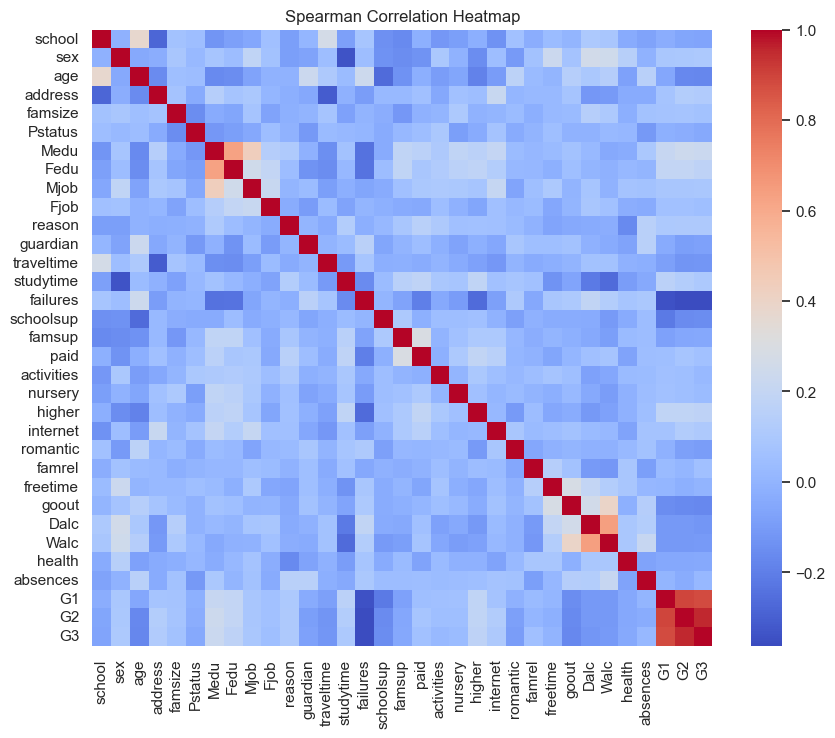

Bottom 25% for weak value: 0.05
Top 25% for strong: 0.17
Median 50% for strong: 0.10
Weak Correlation Threshold: 0.05497687081409259
Strong Correlation Threshold: 0.16611874960450881

Features with Weak Correlation:
Pstatus      -0.044262
Fjob          0.047784
famsup       -0.050482
activities    0.026090
nursery       0.031752
freetime     -0.004994
health       -0.047790
absences      0.017731
Name: G3, dtype: float64

Features with Strong Correlation:
age        -0.173438
Medu        0.225036
Fedu        0.170049
failures   -0.361224
higher      0.172418
goout      -0.166119
G1          0.878001
G2          0.957125
G3          1.000000
Name: G3, dtype: float64


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute Spearman correlation
spearman_correlation = student_mat_mapping.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(spearman_correlation, annot=False, cmap='coolwarm', cbar=True)
plt.title("Spearman Correlation Heatmap")
plt.show()

# Extract correlation with the target variable (e.g., 'G3')
correlation_with_target = spearman_correlation['G3']
# Compute absolute correlations
absolute_correlations = correlation_with_target.abs()

# Determine dynamic thresholds
weak_threshold = absolute_correlations.quantile(0.25)  # Bottom 25% for weak
print(f"Bottom 25% for weak value: {weak_threshold:.2f}")
strong_threshold = absolute_correlations.quantile(0.75)  # Top 25% for strong
print(f"Top 25% for strong: {strong_threshold:.2f}")
median_threshold = absolute_correlations.quantile(0.5)  
print(f"Median 50% for strong: {median_threshold:.2f}")

# Identify weak and strong correlation features
weak_correlation_features = correlation_with_target[absolute_correlations < weak_threshold].index.tolist()
strong_correlation_features = correlation_with_target[absolute_correlations >= strong_threshold].index.tolist()

# Display results
print(f"Weak Correlation Threshold: {weak_threshold}")
print(f"Strong Correlation Threshold: {strong_threshold}")

print("\nFeatures with Weak Correlation:")
print(correlation_with_target[weak_correlation_features])

print("\nFeatures with Strong Correlation:")
print(correlation_with_target[strong_correlation_features])


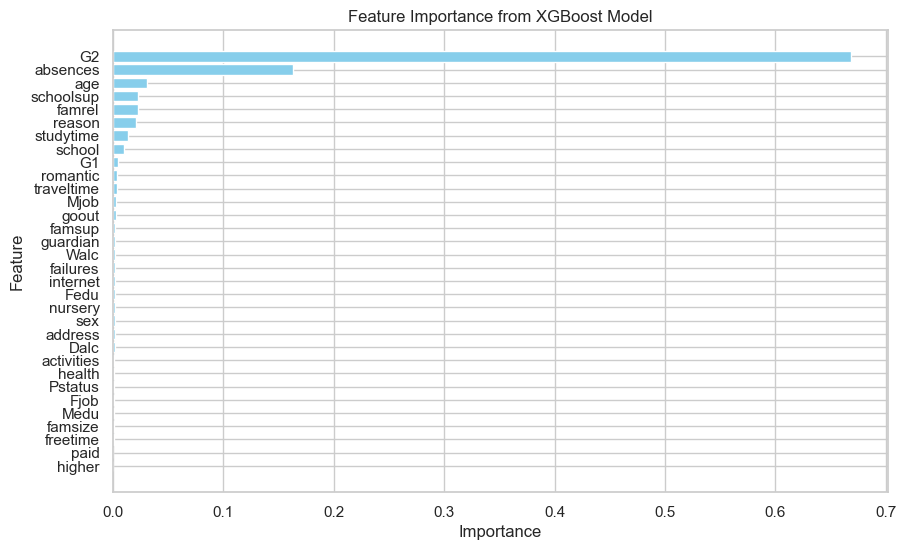

In [67]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.title("Feature Importance from XGBoost Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


# Is the model mostly overestimating? underestimating? Why?

### The model is mostly overestimating for the following reasons:

From the Heatmap: Features like **G2 and G1** are strongly positively correlated with **G3**. The model likely overemphasizes these features, inflating predictions for students with high intermediate grades.

From Feature Importance: The model **relies heavily on G2** (dominant importance), but it may not fully account for negatively correlated features like **failures and absences**, which could temper predictions, leading to overestimations.

### The model underestimates for the following reasons:

From the Heatmap: Features like failures and absences are negatively correlated with G3 (final grade). If the model underweights these features, it may fail to properly lower predictions for students with more failures or absences, causing underestimations.

From Feature Importance: Features with smaller importance scores, such as failures, studytime, and schoolsup, may not sufficiently impact predictions, especially for students with low grades. This leads to the model missing key factors that explain poor performance.

Noise from Weak Correlations: Weakly correlated features (e.g., romantic, health) might add noise to predictions, reducing accuracy for students at the lower end of the grade spectrum.

# Are some features sabotaging the model? How?
### Identifying Misleading and Noisy Features Based on Importance and Correlation

In [68]:
import pandas as pd

# Assume 'model' is your trained model and 'X_train' is the feature data
# Compute feature importance
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Compute Spearman correlation with the target variable
spearman_correlation = student_mat.corr(method='spearman')['G3']  # Replace 'G3' with your target

# Create a DataFrame for analysis
analysis_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances,
    'Correlation': spearman_correlation[feature_names]
})

# Define thresholds
weak_correlation_threshold =spearman_correlation.mean() 
low_importance_threshold = feature_importances.mean()  

# Identify features with:
# 1. High importance but weak correlation
high_importance_weak_correlation = analysis_df[
    (analysis_df['Importance'] >= low_importance_threshold) & 
    (analysis_df['Correlation'].abs() < weak_correlation_threshold)
]

# 2. Low importance and weak/no correlation
low_importance_weak_correlation = analysis_df[
    (analysis_df['Importance'] < low_importance_threshold) & 
    (analysis_df['Correlation'].abs() < weak_correlation_threshold)
]




1. Weak Correlation Features with Importance:
Features like absences have weak correlation with the target (G3, correlation = 0.0177) but are assigned high importance (importance = 0.1627).
How it Sabotages:
The model may overfit to features like absences, treating them as significant predictors even though their relationship with G3 is weak. This can lead to noisy predictions and reduced generalization.


In [69]:
# Display results
print("Features with High Importance but Weak Correlation:")
print(high_importance_weak_correlation)



Features with High Importance but Weak Correlation:
           Feature  Importance  Correlation
absences  absences    0.162709     0.017731


2. Low Importance and Weak Correlation Features:
Features such as school, famsize, Pstatus, and Fjob have both low importance and weak correlations.
How it Sabotages:
These features likely introduce noise without contributing to meaningful predictions. Retaining them may dilute the model's focus on more relevant features.

In [70]:
print("\nFeatures with Low Importance and Weak Correlation:")
print(low_importance_weak_correlation)


Features with Low Importance and Weak Correlation:
               Feature  Importance  Correlation
school          school    0.010463    -0.064571
famsize        famsize    0.000844     0.066279
Pstatus        Pstatus    0.001142    -0.044262
Fjob              Fjob    0.001006     0.047784
guardian      guardian    0.002206    -0.075010
famsup          famsup    0.002220    -0.050482
paid              paid    0.000490     0.060924
activities  activities    0.001339     0.026090
nursery        nursery    0.001777     0.031752
famrel          famrel    0.023070     0.054977
freetime      freetime    0.000761    -0.004994
health          health    0.001253    -0.047790


### Identifying the Most Impactful Features Using Ablation Testing

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Initialize variables
best_score = float('inf')  # Best MAE score
best_feature = None  # Feature whose removal gives the best score
scores_map = {}  # To store MAE scores for each feature

# Train-test split (only done once to ensure consistency across iterations)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each feature by removing it and retraining the model
for feature in X.columns:
    # Drop the current feature
    X_subset_train = X_train.drop(columns=[feature])
    X_subset_test = X_test.drop(columns=[feature])
    
    # Train the model
    model = XGBRegressor()
    model.fit(X_subset_train, y_train)
    
    # Predict and calculate MAE
    y_pred = model.predict(X_subset_test)
    mae = mean_absolute_error(y_test, y_pred)
    scores_map[feature] = mae
    
    # Track the best feature
    if mae < best_score:
        best_score = mae
        best_feature = feature

# Sort the results by MAE (ascending) and get the top 12 features
sorted_scores = sorted(scores_map.items(), key=lambda item: item[1])[:12]

# Display results
print("Top 12 Features Impact (MAE):")
for rank, (feature, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {feature}: {score:.4f}")

# Optional: Return sorted dictionary if needed
sorted_dict = dict(sorted_scores)


Top 12 Features Impact (MAE):
1. reason: 1.1039
2. schoolsup: 1.1678
3. Pstatus: 1.1810
4. famsize: 1.1865
5. romantic: 1.1937
6. sex: 1.1941
7. internet: 1.1951
8. paid: 1.1964
9. Fedu: 1.1972
10. higher: 1.1978
11. traveltime: 1.1984
12. freetime: 1.1987


In [40]:
# Extract features from sorted_dict (keys of the dictionary)
sorted_features = set([feature for feature, _ in sorted_dict.items()])

# Extract features from low_importance_weak_correlation (assuming it's a DataFrame)
low_importance_features = set(low_importance_weak_correlation['Feature'])

# Find overlap between the two sets
overlap_features = sorted_features.intersection(low_importance_features)

# Measure the overlap
overlap_count = len(overlap_features)
total_low_importance = len(low_importance_features)
total_sorted_features = len(sorted_features)

# Print results
print(f"Number of overlapping features: {overlap_count}")
print(f"Percentage of low-importance features overlapping: {(overlap_count / total_low_importance) * 100:.2f}%")
print(f"Percentage of ablation-sorted features overlapping: {(overlap_count / total_sorted_features) * 100:.2f}%")
print(f"Overlapping Features: {overlap_features}")


Number of overlapping features: 4
Percentage of low-importance features overlapping: 33.33%
Percentage of ablation-sorted features overlapping: 33.33%
Overlapping Features: {'Pstatus', 'freetime', 'paid', 'famsize'}


In [48]:
correlations = student_mat.corr(method='spearman')
print("Identifying Weak Correlation Features:")
spearman_correlation_G3 = correlations['G3'].abs().sort_values().head(12)
print(spearman_correlation_G3)
weak_correlation_features = spearman_correlation_G3.index.tolist()

overlap_features = sorted_features.intersection(weak_correlation_features)
correlations = student_mat.corr(method='spearman')
print("\n Identifying Overlapping Important Features:")

print(overlap_features)

Identifying Weak Correlation Features:
freetime      0.004994
absences      0.017731
activities    0.026090
nursery       0.031752
Pstatus       0.044262
Fjob          0.047784
health        0.047790
famsup        0.050482
famrel        0.054977
paid          0.060924
school        0.064571
famsize       0.066279
Name: G3, dtype: float64

 Identifying Overlapping Important Features:
{'Pstatus', 'freetime', 'paid', 'famsize'}


In [79]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for all features
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Identify features with high VIF
high_vif_features = vif_data[vif_data["VIF"] > 5]

print("Features with High VIF:")
print(high_vif_features)

# Check pairwise correlation for high VIF features
correlation_matrix = X.corr()  # Pairwise correlation matrix
for feature in high_vif_features["Feature"]:
    correlated_features = correlation_matrix[feature][correlation_matrix[feature].abs() > 0.4].index.tolist()
    correlated_features.remove(feature)  # Exclude self-correlation
    if correlated_features:
        print(f"Feature '{feature}' has high correlation with: {correlated_features}")


Features with High VIF:
       Feature        VIF
2          age  90.310080
3      address   5.806337
5      Pstatus  10.658521
6         Medu  16.087866
7         Fedu  11.939712
8         Mjob   6.006968
9         Fjob   8.980194
12  traveltime   6.404490
13   studytime   9.134395
19     nursery   5.363560
20      higher  21.876180
21    internet   7.163394
23      famrel  22.348427
24    freetime  14.324646
25       goout  12.758291
26        Dalc   7.093688
27        Walc   9.376230
28      health   8.205277
30          G1  50.803909
31          G2  38.183058
Feature 'Medu' has high correlation with: ['Fedu', 'Mjob']
Feature 'Fedu' has high correlation with: ['Medu']
Feature 'Mjob' has high correlation with: ['Medu']
Feature 'goout' has high correlation with: ['Walc']
Feature 'Dalc' has high correlation with: ['Walc']
Feature 'Walc' has high correlation with: ['goout', 'Dalc']
Feature 'G1' has high correlation with: ['G2']
Feature 'G2' has high correlation with: ['G1']


Features like G1 (VIF = 50.80), and G2 (VIF = 38.18) have extremely high Variance Inflation Factor (VIF) values, indicating multicollinearity.

How it Sabotages:
Multicollinearity leads to redundancy and instability in feature coefficients. For instance, the model may struggle to distinguish the independent effects of G1, G2, and G3 due to their high correlation.

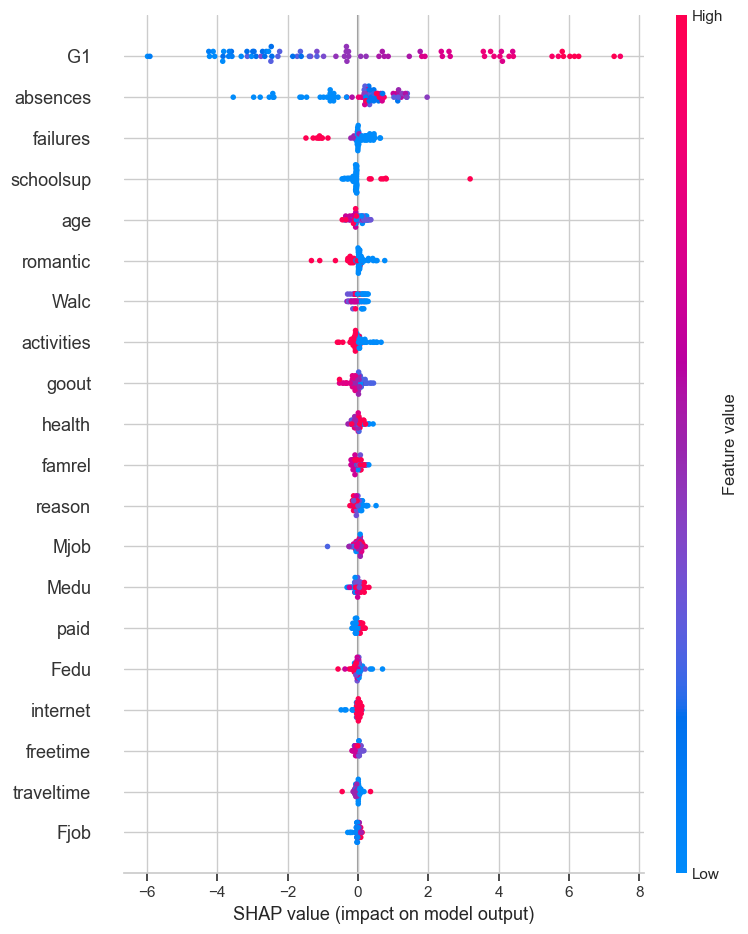

In [45]:
import shap

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


### Train without weak features